In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler

In [93]:
train_set = pd.read_csv('project_train_values.csv', index_col=0)
train_label = pd.read_csv('project_train_labels.csv', index_col=0)

In [94]:
train_label['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [95]:
dummy = ['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
dummy_col = pd.get_dummies(train_set[dummy])
train_set_combined = pd.concat([train_set, dummy_col],axis=1)
train_set_combined.drop(dummy, axis=1, inplace=True)

In [96]:
scaler = StandardScaler()
train_set_combined[['geo_level_1_id', 'geo_level_2_id' , 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq']] = scaler.fit_transform(train_set_combined[['geo_level_1_id', 'geo_level_2_id' , 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq']])


In [65]:
train1 = train.drop(['land_surface_condition','foundation_type','roof_type','ground_floor_type',
                    'other_floor_type','position','plan_configuration','legal_ownership_status'],axis = 1)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(train_set_combined, label, test_size = 0.2, random_state=42)


In [98]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
ypred=knn.predict(X_test)

In [99]:
y_pred=[]
for i in range(len(ypred)):
    y_pred.append(ypred[i][1])

In [100]:
confusion_matrix(y_test['damage_grade'].tolist(), y_pred)

array([[ 2392,  2534,   244],
       [ 1581, 23554,  4352],
       [  198,  8645,  8621]])

In [101]:
accuracy_score(y_test['damage_grade'].tolist(), y_pred)

0.663206768864757

In [102]:
print(classification_report(y_test['damage_grade'].tolist(), y_pred))

              precision    recall  f1-score   support

           1       0.57      0.46      0.51      5170
           2       0.68      0.80      0.73     29487
           3       0.65      0.49      0.56     17464

    accuracy                           0.66     52121
   macro avg       0.63      0.59      0.60     52121
weighted avg       0.66      0.66      0.65     52121



In [105]:
accuracy = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    ypred=knn.predict(X_test)
    
    y_pred=[]
    for j in range(len(ypred)):
        y_pred.append(ypred[j][1])
        
    accuracy.append(accuracy_score(y_test['damage_grade'].tolist(), y_pred))
    

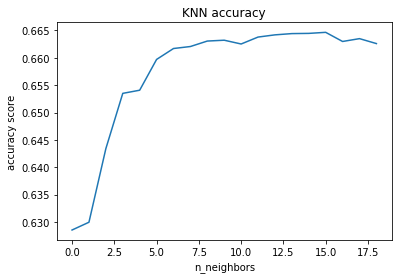

In [108]:
import matplotlib.pyplot as plt
plt.xlabel("n_neighbors")
plt.ylabel("accuracy score")
plt.title("KNN accuracy")
plt.plot(accuracy)

In [ ]:
#k means

In [109]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [76]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)
scaled_features = scaler.fit_transform(X_test)

In [110]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [111]:
kmeans.fit(X_train)

KMeans(init='random', n_clusters=3, random_state=42)

In [113]:
kmeans_predict = []
for i in range(len(kmeans.labels_)):
    kmeans_predict.append(kmeans.labels_[i]+1)

In [114]:
accuracy_score(y_train['damage_grade'].tolist(),kmeans_predict)

0.2454671910974674

In [116]:
pd.Series(kmeans.labels_).value_counts()

2    146744
0     60638
1      1098
dtype: int64